On connecte le travail de google colab avec google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


On importe les librairies essentielles : pandas, numpy, matplotlib, seaborn et joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Importation des données du ficher "Train"

In [ ]:
data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/train.csv",sep=";",header=0,index_col=0)

On utilise la méthode info() pour afficher une description du data frame.

On voit qu'il y a 6804 observations et 69 variables, et il y a quelques colonnes qui contiennent des valeurs manquantes.

Et la variable cible est "match".

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6804 entries, 6804 to 1
Data columns (total 69 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       6804 non-null   int64  
 1   id        6804 non-null   int64  
 2   gender    6804 non-null   int64  
 3   idg       6804 non-null   int64  
 4   condtn    6804 non-null   int64  
 5   wave      6804 non-null   int64  
 6   round     6804 non-null   int64  
 7   position  6804 non-null   int64  
 8   positin1  4958 non-null   float64
 9   order     6804 non-null   int64  
 10  partner   6804 non-null   int64  
 11  pid       6794 non-null   float64
 12  match     6804 non-null   int64  
 13  int_corr  6646 non-null   object 
 14  samerace  6804 non-null   int64  
 15  age_o     6722 non-null   float64
 16  race_o    6731 non-null   float64
 17  pf_o_att  6715 non-null   object 
 18  pf_o_sin  6715 non-null   object 
 19  pf_o_int  6715 non-null   object 
 20  pf_o_fun  6706 non-null   obje

# Data cleaning

On supprime les variables inutiles:
- les variables du type identifiant qui ne sont pas uniques : iid,id,idg,pid,partner
- les variables doublons : 
  + "field" est en doublon avec "field_cd";
  + "career" est en doublon avec "career_c";
  + "from" est en doublon avec "zipcode".
- la variable "dec_o" est la décision du partenaire après la rencontre, alors ce qui nous intéresse c'est la prédiction à partir des variables créées avant la rencontre.
- les variables "position","positin1","wave","round","order" sont mises en place pour les rencontres, et elles n'existent pas dans le fichier "submission".

In [ ]:
data.drop(["dec_o","field","career","expnum","iid","id","idg","pid","partner",
           "from","position","positin1","wave",'round', 'order'],axis=1,inplace=True)

On remplace des "," (virgule) par les "." (points) et transforme les variables en type "float".

In [ ]:
col_replaced1 = ["int_corr","pf_o_att","pf_o_int","pf_o_fun","pf_o_amb",
                 "pf_o_sha","pf_o_sin","attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]
def col_convert1(data,col_replaced):
  for col in col_replaced:
    data[col] = data[col].apply(lambda x: float(str(x).replace(',','.')))
col_convert1(data,col_replaced1)

On enlève la virgule (,) et transforme les variables "zipcode" et "income" en type "float".

In [ ]:
data["zipcode"] = data["zipcode"].apply(lambda x: float(str(x).replace(',','')))
data["income"] = data["income"].apply(lambda x: float(str(x).replace(',','')))

On observe les valeurs manquantes

In [ ]:
data.isna().sum()

gender         0
condtn         0
match          0
int_corr     158
samerace       0
age_o         82
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     107
attr_o       141
sinc_o       207
intel_o      229
fun_o        277
amb_o        581
shar_o       923
age           73
field_cd      82
race          63
imprace       79
imprelig      79
zipcode      896
income      3248
goal          79
date          97
go_out        79
career_c     152
sports        93
tvsports      93
exercise      93
dining        93
museums       93
art           93
hiking        93
gaming        93
clubbing      93
reading       93
tv            93
theater       93
movies        93
concerts      93
music         93
shopping      93
yoga          93
exphappy      93
attr1_1       93
sinc1_1       93
intel1_1      93
fun1_1       103
amb1_1       113
shar1_1      113
dtype: int64

On remplace les valeurs quantitatives manquantes par la moyenne

In [ ]:
def columns_filled(data,columns):
  for col in columns:
    mean = data[col].mean()
    data[col] = data[col].fillna(mean)
columns_filled(data,data.columns)

On transfomre "match" en "category"

In [ ]:
data.match = data.match.astype("category")

On voit que les données sont "propres" et "prêtes à l'emploi" maintenant

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6804 entries, 6804 to 1
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gender    6804 non-null   int64   
 1   condtn    6804 non-null   int64   
 2   match     6804 non-null   category
 3   int_corr  6804 non-null   float64 
 4   samerace  6804 non-null   int64   
 5   age_o     6804 non-null   float64 
 6   race_o    6804 non-null   float64 
 7   pf_o_att  6804 non-null   float64 
 8   pf_o_sin  6804 non-null   float64 
 9   pf_o_int  6804 non-null   float64 
 10  pf_o_fun  6804 non-null   float64 
 11  pf_o_amb  6804 non-null   float64 
 12  pf_o_sha  6804 non-null   float64 
 13  attr_o    6804 non-null   float64 
 14  sinc_o    6804 non-null   float64 
 15  intel_o   6804 non-null   float64 
 16  fun_o     6804 non-null   float64 
 17  amb_o     6804 non-null   float64 
 18  shar_o    6804 non-null   float64 
 19  age       6804 non-null   float64 
 20  field_cd

In [ ]:
data.to_csv("data_cleaned.csv")

# Analyes des variables

Quelques statistiques élémentaires sur les données

In [ ]:
data.describe(include="all")

,gender,condtn,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,...,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,6804.000000,6804.000000,6804.0,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,...,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.00000
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.500735,1.812169,NaN,0.196088,0.411229,26.370872,2.696182,22.229327,17.448046,20.270785,...,7.852332,5.543883,4.287588,5.474445,22.264481,17.444141,20.269158,17.366577,11.063479,11.79242
std,0.500036,0.390606,NaN,0.299530,0.492093,3.544273,1.207776,12.621446,6.936095,6.884816,...,1.776116,2.616472,2.704327,1.695701,12.650579,6.944336,6.889086,6.092877,6.143387,6.16272
min,0.000000,1.000000,NaN,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,-0.010000,0.000000,24.000000,2.000000,15.000000,15.000000,17.310000,...,7.000000,3.000000,2.000000,5.000000,15.000000,15.000000,17.310000,15.000000,5.000000,10.00000
50%,1.000000,2.000000,NaN,0.200000,0.000000,26.000000,2.000000,20.000000,18.000000,20.000000,...,8.000000,6.000000,4.000000,6.000000,20.000000,18.000000,20.000000,17.950000,10.000000,11.00000
75%,1.000000,2.000000,NaN,0.420000,1.000000,28.000000,4.000000,25.000000,20.000000,23.000000,...,9.000000,8.000000,7.000000,7.000000,25.000000,20.000000,23.000000,20.000000,15.000000,15.38000


On analyse la corrélation entre les variables

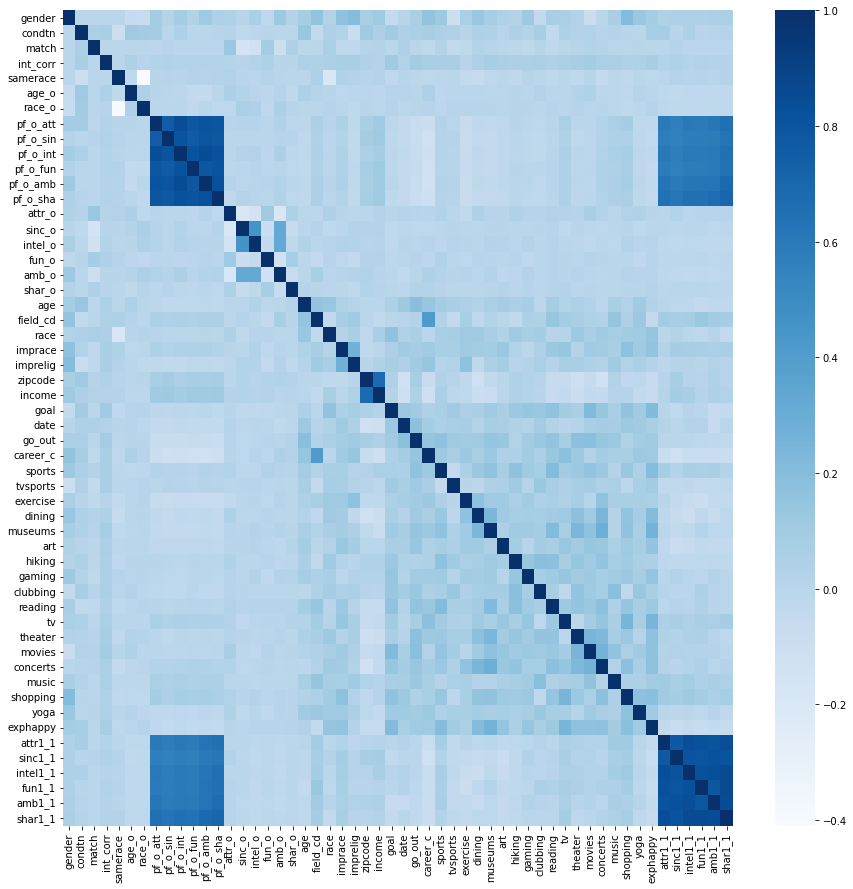

In [ ]:
data_cor = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data_cor,cmap='Blues')

On cherche les 12 variables les plus corrélées négativement avec la variable cible "match"

In [ ]:
print(data_cor["match"].sort_values().head(12))


sinc_o     -0.159741
intel_o    -0.121786
amb_o      -0.096785
tvsports   -0.045186
reading    -0.027127
imprace    -0.025835
imprelig   -0.025376
exercise   -0.020969
career_c   -0.020246
gaming     -0.019575
hiking     -0.011101
age        -0.010042
Name: match, dtype: float64


On cherche les 12 variables les plus corrélées positivement avec la variable cible "match"

In [ ]:
print(data_cor["match"].sort_values(ascending=False).head(13))

match       1.000000
attr_o      0.134866
fun_o       0.088204
race        0.062913
condtn      0.059067
shar_o      0.045891
date        0.042432
movies      0.028654
dining      0.026933
income      0.024219
sports      0.020916
zipcode     0.018233
concerts    0.017248
Name: match, dtype: float64


Quelques graphiques sur les variables corrélées négativement avec la variable "match" en fonction de cette dernière.

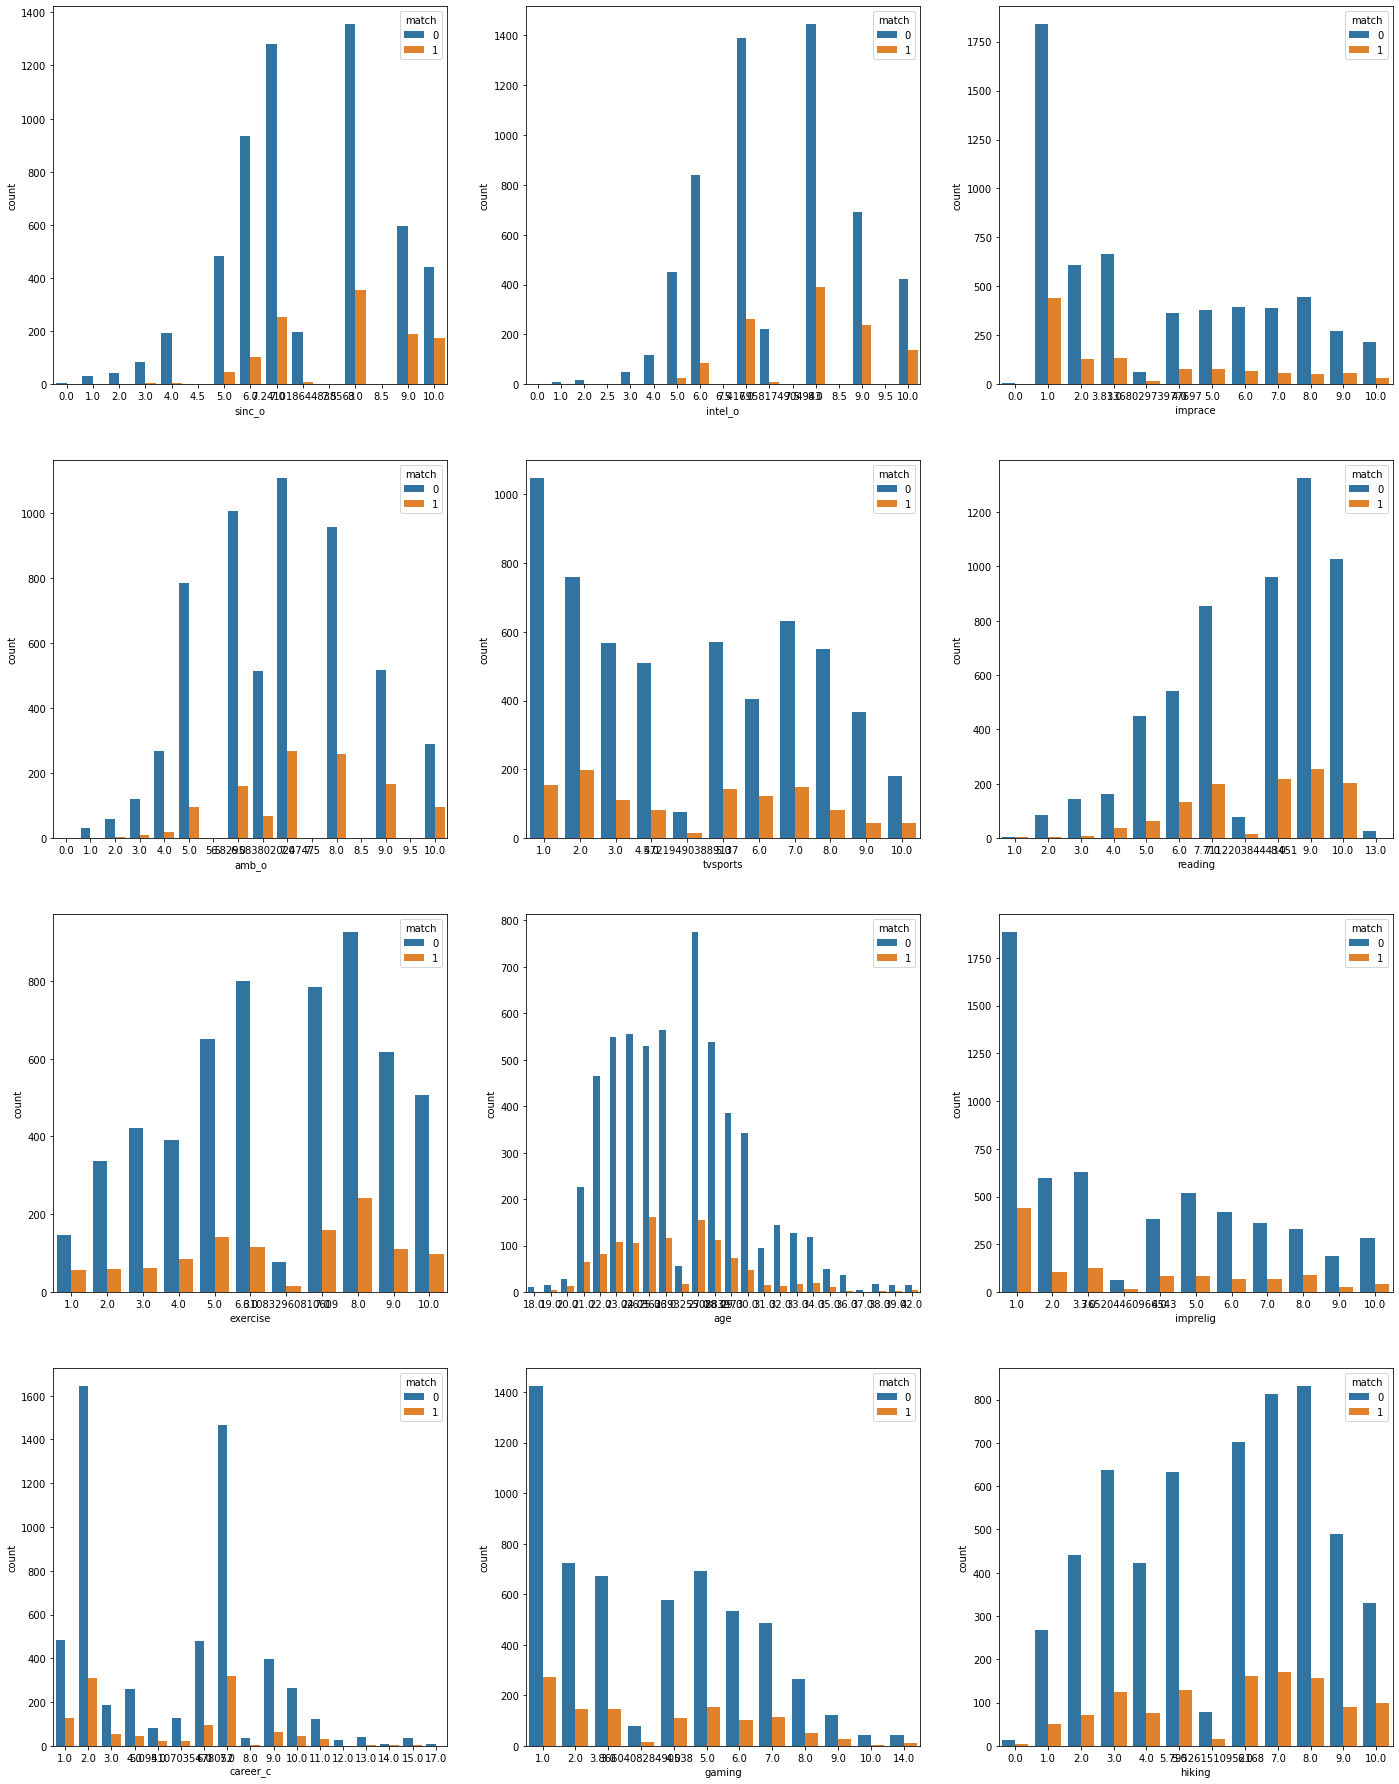

In [ ]:
cols_negatif = ["sinc_o","intel_o","imprace","amb_o","tvsports","reading","exercise","age","imprelig","career_c","gaming","hiking"]
n_rows_negatif = 4
n_cols_negatif = 3

fig,ax=plt.subplots(n_rows_negatif,n_cols_negatif,figsize=(n_cols_negatif*8,n_rows_negatif*8))
for r in range(0,n_rows_negatif):
  for c in range(0,n_cols_negatif):
    i = r*n_cols_negatif + c
    if i < len(cols_negatif):
      ax_i= ax[r,c]
      sns.countplot(data=data,x=cols_negatif[i], hue="match",ax=ax_i)

Quelques graphiques sur les variables corrélées positivement avec la variable "match" en fonction de cette dernière.

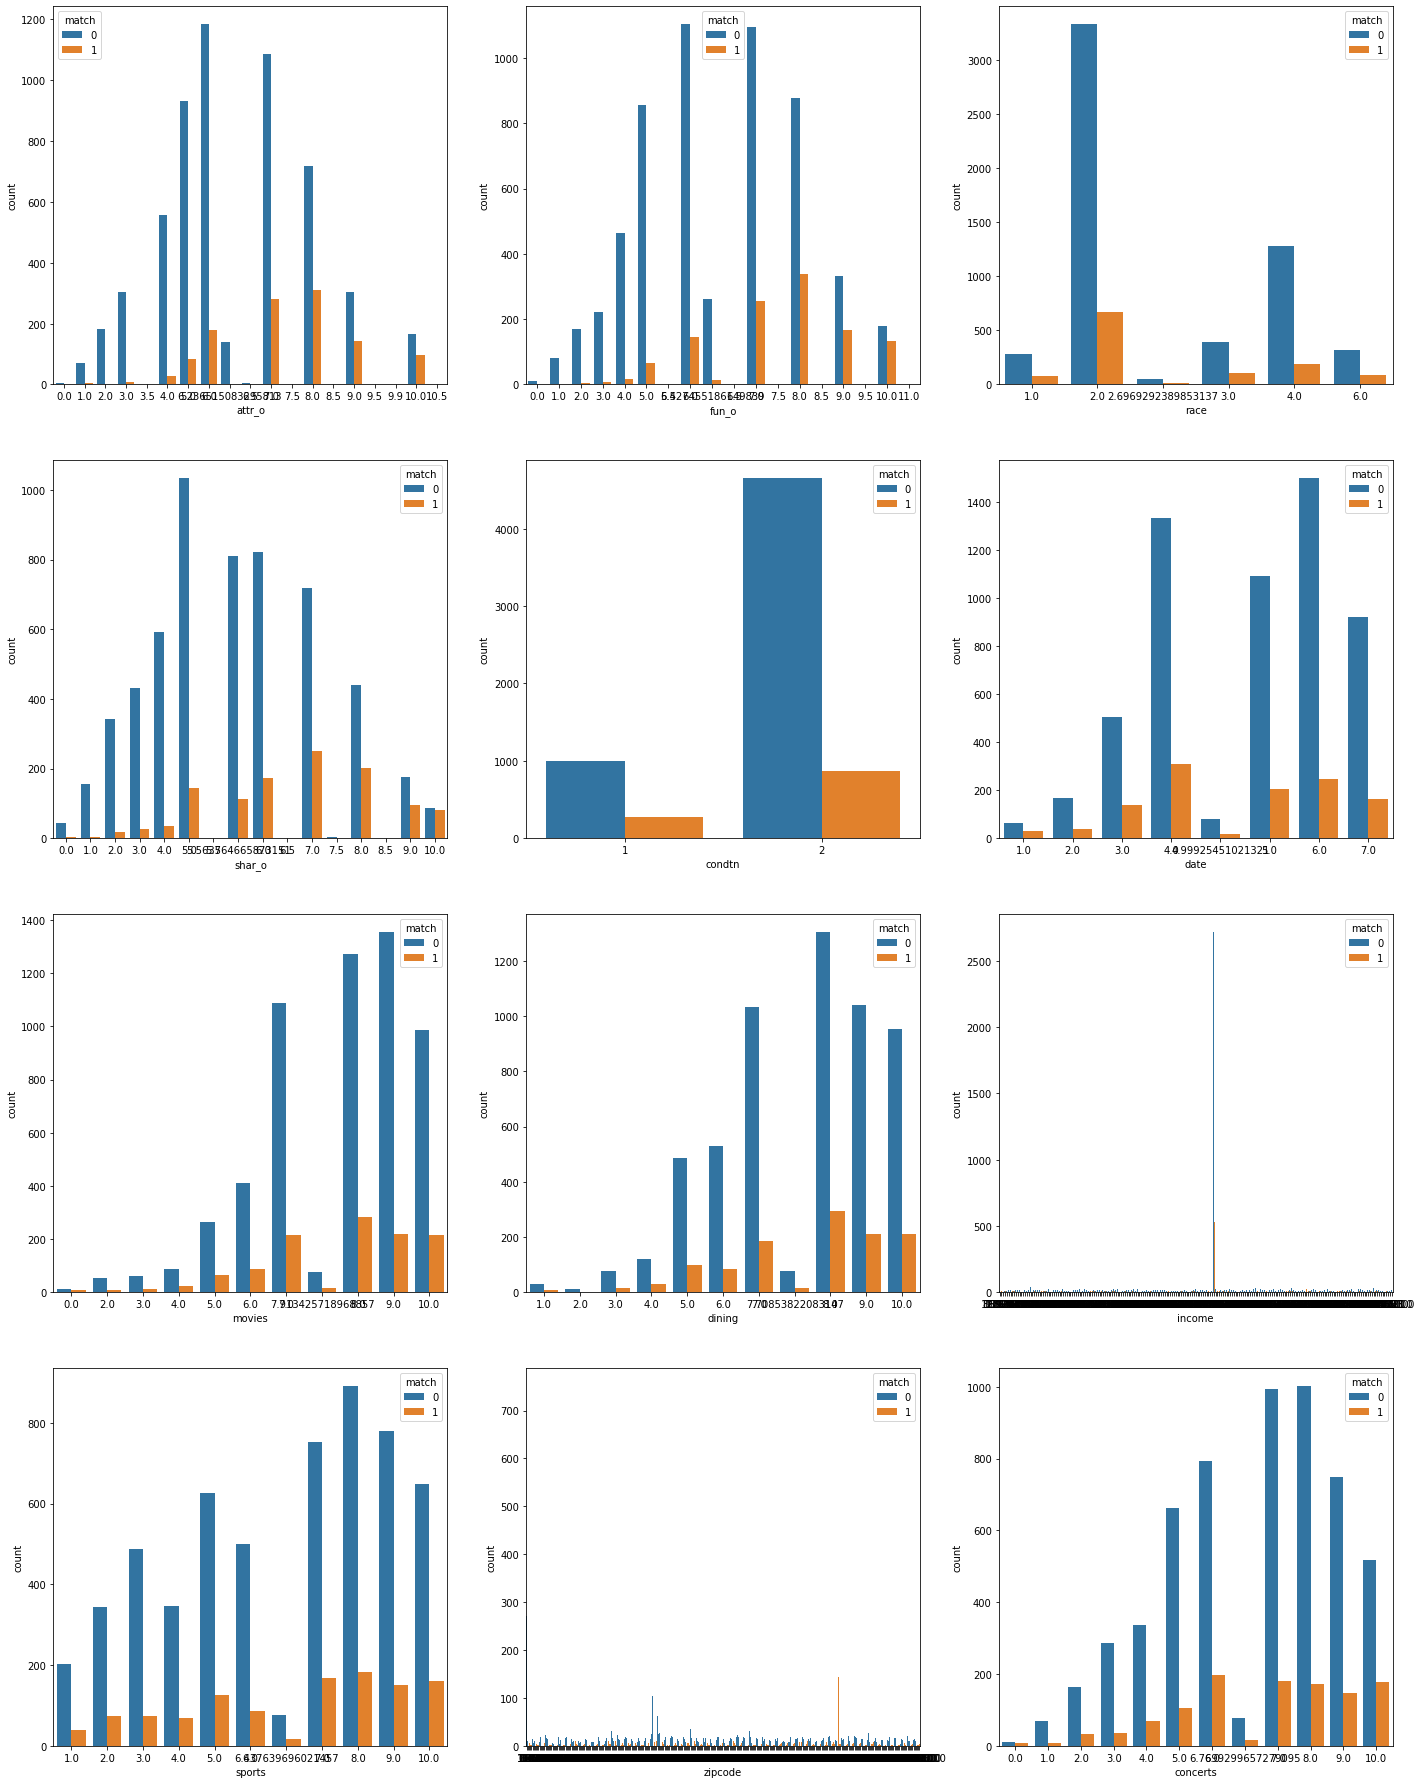

In [ ]:
cols_positif = ["attr_o","fun_o","race","shar_o","condtn","date","movies","dining","income","sports","zipcode","concerts"]
n_rows_positif = 4
n_cols_positif = 3

fig,ax=plt.subplots(n_rows_positif,n_cols_positif,figsize=(n_cols_positif*8,n_rows_positif*8))
for r in range(0,n_rows_positif):
  for c in range(0,n_cols_positif):
    i = r*n_cols_positif + c
    if i < len(cols_positif):
      ax_i= ax[r,c]
      sns.countplot(data=data,x=cols_positif[i], hue="match",ax=ax_i)

# Feature engineering

On utilise la méthode "Mutual Information" pour analyser la relation entre la variable cible et les autres. L'avantage de cette méthode est qu'elle peut détecter tout type de relation, tandis que la corrélation ne détecte que les relations linéaires.

Tout d'abord, on copie le data frame pour ne pas modifier l'original.

In [ ]:
a = data.copy()
b = a.pop("match")

Après, on calcule les scores MI

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(a, b):
    mi_scores = mutual_info_regression(a, b,random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=a.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(a, b)
print(mi_scores)

fun_o       0.047969
attr_o      0.040907
zipcode     0.037254
shar_o      0.036003
income      0.029254
race        0.026182
pf_o_amb    0.025588
go_out      0.023299
pf_o_att    0.020404
sinc_o      0.018272
date        0.016417
sinc1_1     0.012108
pf_o_sin    0.012043
gender      0.011114
amb1_1      0.010730
career_c    0.010237
shar1_1     0.010082
tvsports    0.009350
field_cd    0.008299
int_corr    0.007453
samerace    0.006920
amb_o       0.006500
exphappy    0.006346
clubbing    0.006285
reading     0.005362
pf_o_fun    0.003941
imprace     0.003891
museums     0.002068
intel_o     0.001740
condtn      0.000576
race_o      0.000444
goal        0.000000
concerts    0.000000
age         0.000000
fun1_1      0.000000
intel1_1    0.000000
pf_o_int    0.000000
attr1_1     0.000000
imprelig    0.000000
yoga        0.000000
shopping    0.000000
music       0.000000
movies      0.000000
exercise    0.000000
sports      0.000000
tv          0.000000
age_o       0.000000
gaming      0

On fait un graphique à barres pour faciliter les comparaisons

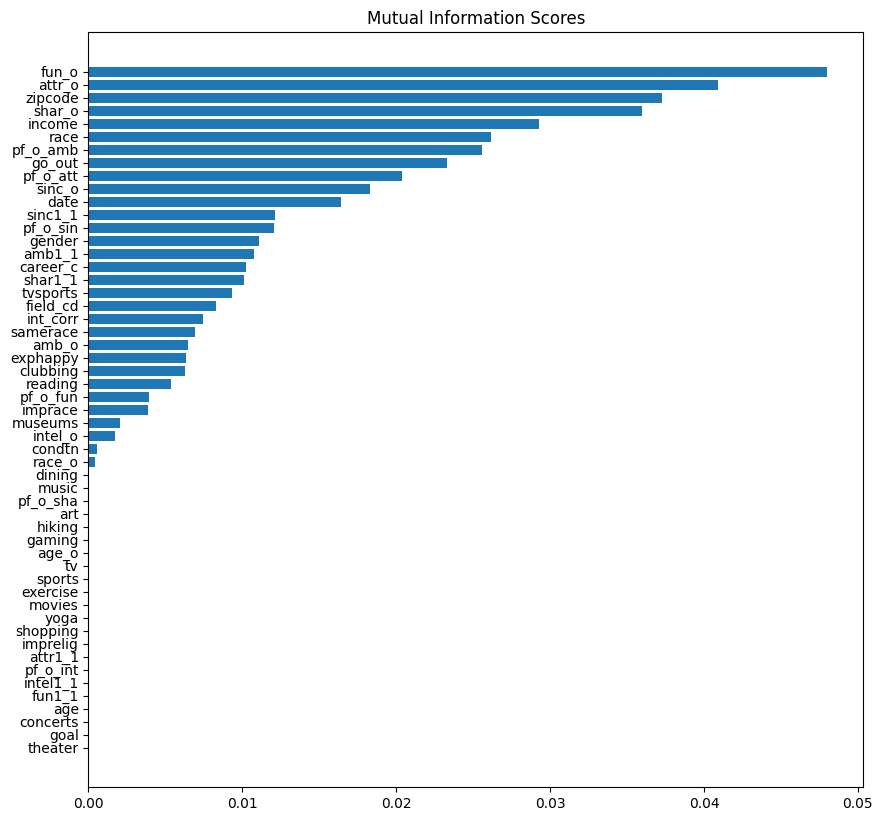

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores)

# Echantillonnage

On crée un objet X avec les variables explicatives, et un objet y avec la variable à expliquer

In [ ]:
X=data.loc[:,~data.columns.isin(['match'])]
y=data.iloc[:,2]

In [ ]:
features = ["fun_o","pf_o_sha","shar_o","attr_o","zipcode","amb1_1","go_out",
            "pf_o_att","sinc_o","sinc1_1","date","pf_o_amb","race",
            "pf_o_sin","age_o","career_c"]

X = X[features]

On scinde l'échantillon en apprentissage / test

In [ ]:
from sklearn import model_selection
X_app,X_test,y_app,y_test = model_selection.train_test_split(X,y,test_size = 2000,stratify=y) 
print(X_app.shape,X_test.shape,y_app.shape,y_test.shape)

(4804, 18) (2000, 18) (4804,) (2000,)


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_app_re, y_app_re = sm.fit_resample(X_app, y_app.ravel())

# Prédiction avec RandomForestClassifier

On choisit les paramètres à tester dans le GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

parameters = {'max_depth' : np.arange(start = 16, stop = 24, step = 1) , 
              'min_samples_leaf' : np.arange(start = 2, stop = 4, step = 1),
              'min_samples_split' : np.arange(start = 2, stop = 5, step = 1)}


On apprend sur X_app

In [ ]:
modele_foret = RandomForestClassifier()
f1 = make_scorer(f1_score , average='macro')
modele_foret = GridSearchCV(modele_foret,
                                  parameters,
                                  scoring = f1,
                                  verbose = 2, 
                                  cv = 5)
modele_foret.fit(X_app_re, y_app_re)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2; total time=   1.4s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2; total time=   1.4s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3; total time=   1.4s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3; total time=   1.3s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4; total time=   1.3s
[CV] END max_depth=16, mi

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([16, 17, 18, 19, 20, 21, 22, 23]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3, 4])},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [ ]:
print("Voici les paramètres du meilleure modèle : " + 
      str(modele_foret.best_estimator_))
print("Voici le "  + str(modele_foret.scorer_) + 
      " du meilleure modèle : " + str(modele_foret.best_score_))

Voici les paramètres du meilleure modèle : RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4)
Voici le make_scorer(f1_score, average=macro) du meilleure modèle : 0.8727971196822539


On prédit sur X_test

In [ ]:
y_pred_foret = modele_foret.predict(X_test)

On évalue le modèle

In [ ]:
from sklearn.metrics import accuracy_score
print('f1_score : ' + 
      str(f1_score(y_test,y_pred_foret, average='macro')))
print("taux d'erreur : ",1-accuracy_score(y_test,y_pred_foret))

f1_score : 0.6268852115626309
taux d'erreur :  0.17100000000000004


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred_foret)
print(cm)

[[1593   70]
 [ 246   91]]



# Déploiement

Enregistrer le modèle en utilisant joblib.dump

In [ ]:
filename = "model.sav"
joblib.dump(modele_foret, filename)

['model.sav']

Charger le modèle

In [ ]:
loaded_model = joblib.load(filename)

# Prédiction sur file Submission

Importation des données du ficher "submissions"

In [ ]:
sub = pd.read_table("/content/drive/MyDrive/Colab Notebooks/submissions.csv",sep=";",header=0,index_col=0)

On affiche une description du data frame.

On voit qu'il y a 1574 observations et 62 variables, et il y a quelques colonnes qui contiennent des valeurs manquantes.

On va donc faire le nettoyage sur ce fichier de la même façon que pour le fichier "train".

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574 entries, 6805 to 8378
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       1574 non-null   int64  
 1   id        1573 non-null   float64
 2   gender    1574 non-null   int64  
 3   idg       1574 non-null   int64  
 4   condtn    1574 non-null   int64  
 5   partner   1574 non-null   int64  
 6   pid       1574 non-null   int64  
 7   int_corr  1574 non-null   object 
 8   samerace  1574 non-null   int64  
 9   age_o     1552 non-null   float64
 10  race_o    1574 non-null   int64  
 11  pf_o_att  1574 non-null   int64  
 12  pf_o_sin  1574 non-null   int64  
 13  pf_o_int  1574 non-null   int64  
 14  pf_o_fun  1574 non-null   int64  
 15  pf_o_amb  1574 non-null   int64  
 16  pf_o_sha  1552 non-null   float64
 17  attr_o    1503 non-null   float64
 18  sinc_o    1494 non-null   float64
 19  intel_o   1497 non-null   float64
 20  fun_o     1491 non-null   f

On supprime les variables inutiles

In [ ]:
sub.drop(["field","career","expnum","iid","id","idg","pid","partner","from"],axis=1,inplace=True)

On remplace des "," (virgule) par les "." (points) et transforme les variables en type "float".

In [ ]:
col_convert1(sub,col_replaced1)

On enlève la virgule (,) et transforme la variable "zipcode" en type "float".

In [ ]:
sub["zipcode"] = sub["zipcode"].apply(lambda x: float(str(x).replace(',','')))
sub["income"] = sub["income"].apply(lambda x: float(str(x).replace(',','')))

On remplace les valeurs manquantes par la moyenne

In [ ]:
columns_filled(sub,sub.columns)

On crée un nouveau data frame avec les variables explicatives

In [ ]:
sub = sub[features]

On applique la prédiction sur ce nouveau data frame

In [ ]:
y_pred_sub = loaded_model.predict(sub)

On crée un nouveau data frame ne contenant que 2 colonnes: l'identifiant "iid_pid" et la prédiction "target".

In [ ]:
my_submission = pd.DataFrame(y_pred_sub,columns=["target"],index=sub.index)
my_submission.describe()

,target
count,1574.000000
mean,0.089581
std,0.285671
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


On exporte le data frame en format csv

In [ ]:
my_submission.to_csv("my_submission.csv", header=True)